In [ ]:
!python installer.py

In [1]:
import sys 

sys.path.insert(1, 'My_libs/')

import IDmeter
import importlib
importlib.reload(IDmeter)

import Plot_figures
import importlib
importlib.reload(Plot_figures)

import Download_data
import importlib
importlib.reload(Download_data)

import collections
import numpy as np

# READ ME

In the following code we reproduce Figs. 2A, B, C of the main text of our article titled "The intrinsic dimension of gene expression during cell differentiation".

In this code, we reproduce the steps of our analysis, from the raw data to the plot of the intrinsic dimension (ID) trend.
It is important to note that we do not report here the preliminary step consisting in arranging the data into an *anndata* object *adata*, stored in a *h5ad* file. 

*adata* essentially stores two objects:
- the **counts** matrix in *adata.X*
- a dataframe containing metadata about single cells in *adata.obs*. For the following results, the necessary piece of information consists in the **temporal stage** from which each cell has been sampled (*stage* column).

For transparency, for each dataset, we specify the online repository that gives free access to the original data. 

# Mouse pancreatic endocrinogenesis

The original dataset is available on GEO repository (GSE132188).

From the metadata they supply, we took the column named "day" and renamed it *stage* in *adata.obs*.

### Download data

In [5]:
dataset_name = "MousePancreas"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Pancreatic_endocrinogenesis/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to PANCREAS EMBRYOGENESIS dataset!
Metadata in a dataframe with shape (36351, 16)
scRNA-seq data in a counts matrix with shape ((36351, 27998))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 1200 expressed genes were deleted. 0 deleted (0 full of zeros)
 - cells with mitochondrial gene-expression fractions greater than 20.0% (0) were deleted

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr martic with shape ((36351, 16558))
Metadata in a dataframe with columns ['cell', 'stage', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'celltype', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final']


### ID measure

In [6]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'13.5': 5042, '14.5': 9633, '12.5': 10790, '15.5': 10886}
From each stage we will sub-sample 3781 cells


In [7]:
dataset_name = "MousePancreas"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MousePancreas
Time-based grouping of cells
Labels: ['12.5' '13.5' '14.5' '15.5']
3 independent sub-samplings
Counts matrix dimension=(36351, 16558)


Subsampling number 1 , with seed: 892739. 12.5 ID = 48.6 - 13.5 ID = 44.3 - 14.5 ID = 37.1 - 15.5 ID = 28.0 - 


Subsampling number 2 , with seed: 969039. 12.5 ID = 47.4 - 13.5 ID = 44.7 - 14.5 ID = 39.2 - 15.5 ID = 28.1 - 


Subsampling number 3 , with seed: 584910. 12.5 ID = 48.5 - 13.5 ID = 44.4 - 14.5 ID = 39.0 - 15.5 ID = 29.1 - 



### Plot

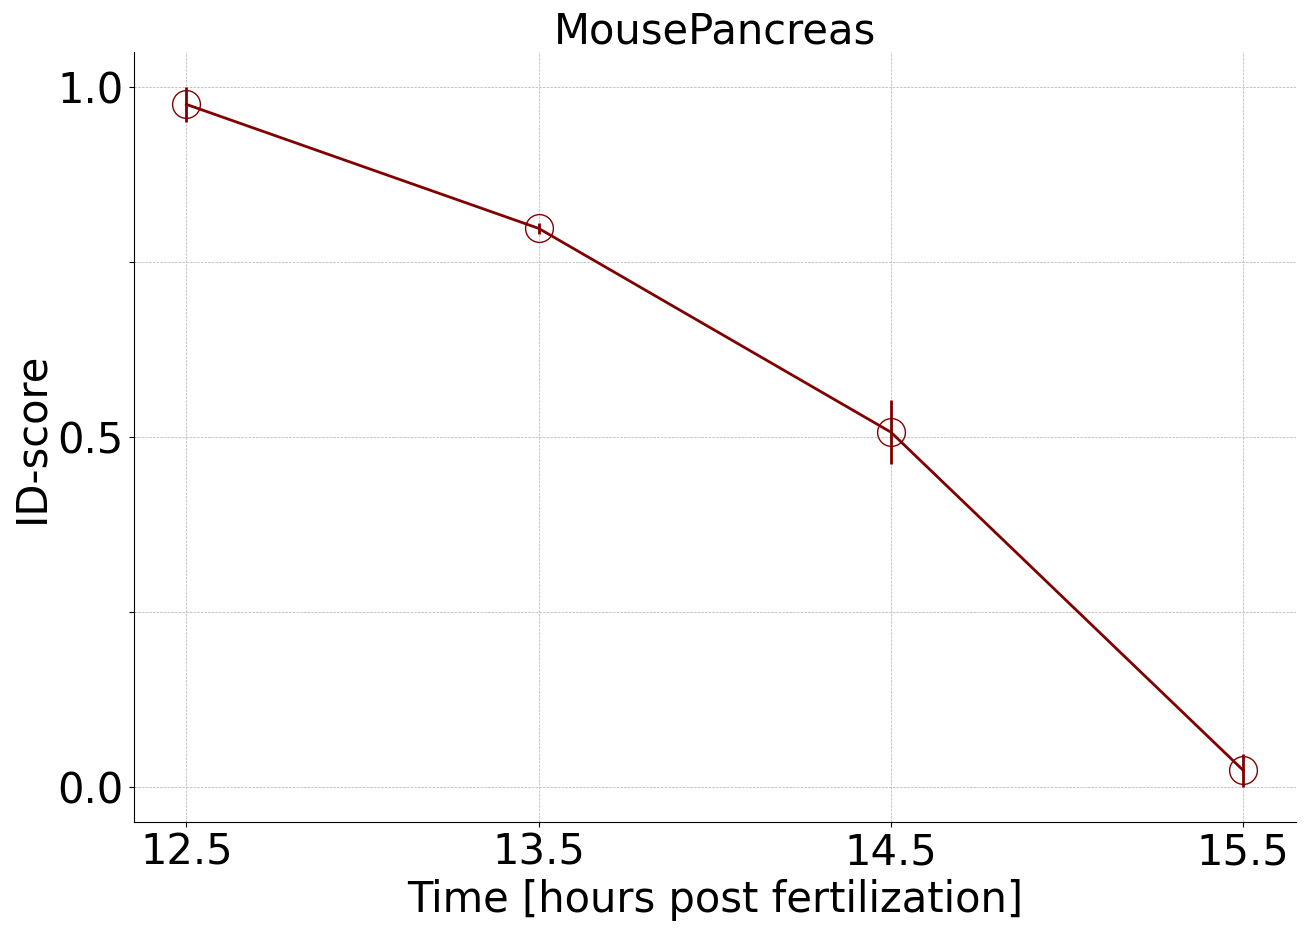

In [8]:
xlabel = f'{labeling} [embryonic day]'
Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel)

# Mouse corticogenesis

The original dataset is available on GEO repository (GSE153162).

From the metadata they supply, we took the column named "orig_ident" and renamed it *stage* in *adata.obs*. The values of this attribute are: 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18_S1', 'E18_S3', 'P1_S1', 'P1', 'P4' (where '_S*' specifies different replica of the experiment). 
For transparency, we show the ID-score for every stage reported in the original dataset in the following, but in the main text of our article we only focus on the time window E10-E17.

### Download data

In [13]:
dataset_name = "MouseCorticogenesis"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Mouse_corticogenesis/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to MOUSE CORTICOGENESIS dataset!
Deleting doublet cells (0) and low quality cells (0)
Metadata in a dataframe with shape (77842, 28)
scRNA-seq data in a counts matrix with shape ((80467, 27998))

Quality control on cells...
In order to follow the quality control of the paper:
 - cells with less than 500 expressed genes were deleted. 0 deleted (0 full of zeros)
 - cells with mitochondrial gene-expression fractions greater than 7.5% (0) were deleted

Genes selection...
Selecting 18734 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((77842, 16461))
Metadata in a dataframe with columns ['stage', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'n_hkgene', 'S_Score', 'G2M_Score', 'Phase', 'CC_Difference', 'seurat_clusters', 'RNA_snn_res_1', 'scrublet_doublet', 'RNA_snn_res_2', 'Doublet_intersect', 'celltype', 'New_cellType', 'biosample_id', 'donor_id', 'species', 'disease', 'disease__ontology_lab

### ID measure

In [14]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'E10': 1041, 'E11': 2647, 'E14': 3268, 'P1': 4487, 'E16': 5042, 'E18_S1': 5925, 'E13': 6050, 'P1_S1': 6165, 'P4': 6251, 'E12': 7357, 'E17': 8495, 'E15': 10289, 'E18_S3': 10825}
From each stage we will sub-sample 780 cells


In [19]:
dataset_name = "MouseCorticogenesis"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset MouseCorticogenesis
Time-based grouping of cells
Labels: ['E10' 'E11' 'E12' 'E13' 'E14' 'E15' 'E16' 'E17' 'E18_S1' 'E18_S3' 'P1_S1'
 'P1' 'P4']
3 independent sub-samplings
Counts matrix dimension=(77842, 16461)


Subsampling number 1 , with seed: 520285. E10 ID = 98.8 - E11 ID = 49.5 - E12 ID = 39.4 - E13 ID = 48.2 - E14 ID = 33.4 - E15 ID = 37.9 - E16 ID = 36.9 - E17 ID = 39.4 - E18_S1 ID = 39.6 - E18_S3 ID = 36.4 - P1_S1 ID = 35.8 - P1 ID = 29.8 - P4 ID = 36.6 - 


Subsampling number 2 , with seed: 425624. E10 ID = 99.4 - E11 ID = 45.2 - E12 ID = 38.9 - E13 ID = 48.8 - E14 ID = 35.2 - E15 ID = 36.4 - E16 ID = 31.0 - E17 ID = 44.0 - E18_S1 ID = 39.8 - E18_S3 ID = 40.3 - P1_S1 ID = 33.2 - P1 ID = 33.6 - P4 ID = 34.9 - 


Subsampling number 3 , with seed: 667451. E10 ID = 102.1 - E11 ID = 50.1 - E12 ID = 40.5 - E13 ID = 44.6 - E14 ID = 34.5 - E15 ID = 34.5 - E16 ID = 34.9 - E17 ID = 44.0 - E18_S1 ID = 40.6 - E18_S3 ID = 33.2 - P1_S1 ID = 39.7 - P1 ID = 29.5 - P4 ID = 3

### Plot

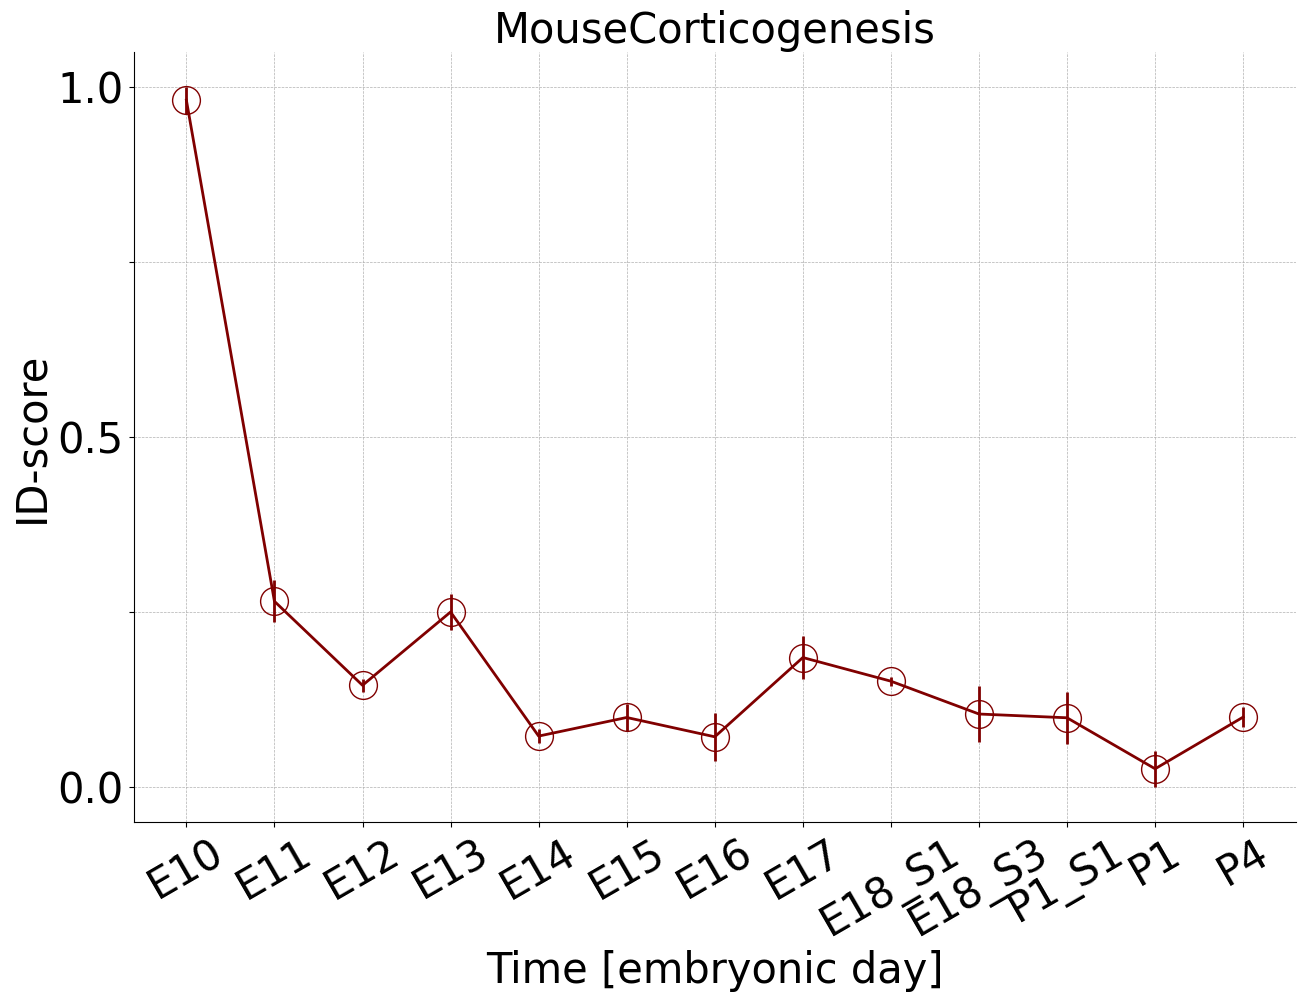

In [20]:
xlabel = f'{labeling} [embryonic day]'

plot_params = {"figsize": (15, 10),
                "label_size": 30,
                "markersize": 20,
                "linewidth": 2,
                "xlabel_rotation": 30}

Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel, plot_params = plot_params)

# Zebrafish neurogenesis Raj

The original dataset is available on GEO repository (GSE158142).

From the metadata they supply, we took the column named "stage" and we stored it in *adata.obs*.

### Data download

In [29]:
dataset_name = "ZebraNeurogenesis"
data_file_folder = '/home/niccolo/Desktop/Waddington ID/Codici/Zebrafish_raj/Data/'

mtx, df, genes_name = Download_data.download_dataset(dataset_name,
                                                  data_file_folder, 
                                                  verbose = True)

Welcome to ZEBRAFISH RAJ dataset!
Metadata in a dataframe with shape (137706, 3)
scRNA-seq data in a counts matrix with shape ((137706, 32191))

Quality control on cells...

Genes selection...
Selecting 23563 protein-coding genes
Deleting genes because full of zeros

Normalization of the counts matrix...

scRNA-seq data in csr matrix with shape ((137706, 22905))
Metadata in a dataframe with columns ['cell', 'stage', 'sample']


### ID measure

In [30]:
times_dict = dict(collections.Counter(df.stage.values))
labels = stages = np.array(list(times_dict.keys()))

times_dict = dict(sorted(times_dict.items(), key=lambda item: item[1]))
n_subsampled_cells = int(list(times_dict.values())[0]*0.75)

print("Number of cells per developmental stage:", times_dict)
print("From each stage we will sub-sample", n_subsampled_cells, "cells")

Number of cells per developmental stage: {'5dpf': 7980, '24hpf': 9376, '14hpf': 10116, '16hpf': 10792, '18hpf': 10904, '20hpf': 13266, '8dpf': 15764, '2dpf': 16042, '3dpf': 18065, '15dpf': 25401}
From each stage we will sub-sample 5985 cells


In [31]:
dataset_name = "ZebraNeurogenesis"
labeling = "Time"
n_subsamplings = 3

results_dict = IDmeter.ID(dataset_name, labeling, 
                        labels, df, mtx, genes_name, 
                        n_subsamplings = n_subsamplings, 
                        verbose = False)

Settings:
Dataset ZebraNeurogenesis
Time-based grouping of cells
Labels: ['14hpf' '16hpf' '18hpf' '20hpf' '24hpf' '2dpf' '3dpf' '5dpf' '8dpf'
 '15dpf']
3 independent sub-samplings
Counts matrix dimension=(137706, 22905)


Subsampling number 1 , with seed: 499839. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 56.6 - 16hpf ID = 52.8 - 18hpf ID = 52.1 - 20hpf ID = 26.3 - 24hpf ID = 35.3 - 2dpf ID = 30.4 - 3dpf ID = 25.6 - 5dpf ID = 22.3 - 8dpf ID = 31.7 - 15dpf ID = 26.7 - 


Subsampling number 2 , with seed: 544208. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 54.9 - 16hpf ID = 52.7 - 18hpf ID = 49.4 - 20hpf ID = 27.0 - 24hpf ID = 35.0 - 2dpf ID = 30.4 - 3dpf ID = 25.5 - 5dpf ID = 22.4 - 8dpf ID = 33.9 - 15dpf ID = 27.8 - 


Subsampling number 3 , with seed: 852767. 
Sub-sampling so that every stage is equally represented by 5000 cells
14hpf ID = 58.5 - 16hpf ID = 53.3 - 18hpf ID = 51.5 - 20hpf ID = 27.0 - 24hpf ID 

### Plot

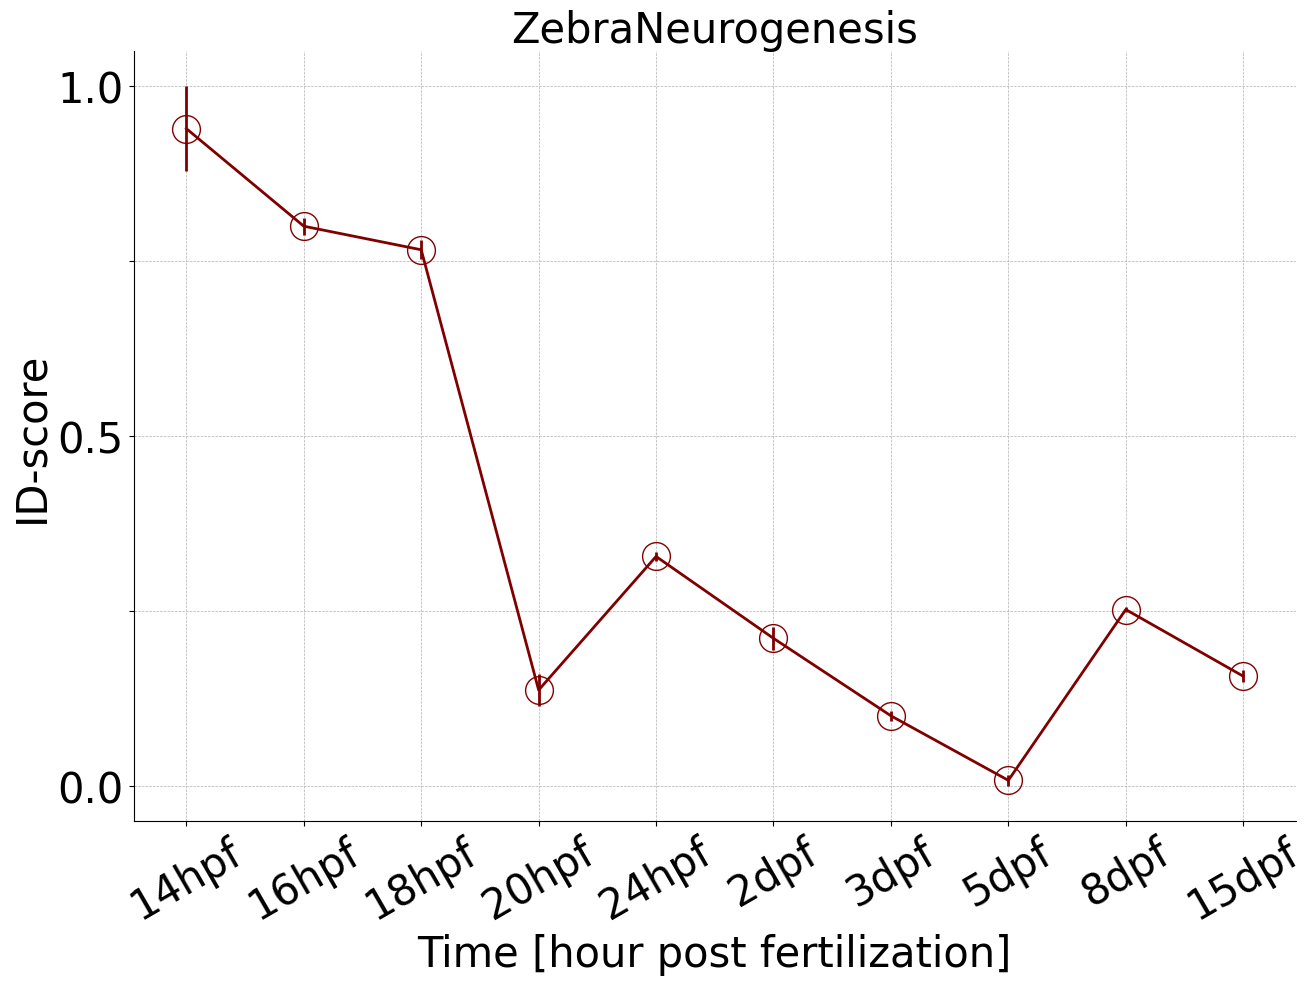

In [27]:
xlabel = f'{labeling} [hour post fertilization]'

plot_params = {"figsize": (15, 10),
                "label_size": 30,
                "markersize": 20,
                "linewidth": 2,
                "xlabel_rotation": 30}

Plot_figures.plot_temporal_trend(results_dict, dataset_name, xlabel, 
                        plot_params=plot_params)